In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [2]:
## load the datasets
orders = pd.read_csv(r"C:\Users\USER\Downloads\Pizza+Place+Sales (1)\pizza_sales\orders.csv")
order_details = pd.read_csv(r"C:\Users\USER\Downloads\Pizza+Place+Sales (1)\pizza_sales\order_details.csv")
pizzas = pd.read_csv(r"C:\Users\USER\Downloads\Pizza+Place+Sales (1)\pizza_sales\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\USER\Downloads\Pizza+Place+Sales (1)\pizza_sales\pizza_types.csv",encoding= "latin1")


In [3]:
# Step 1: Merge orders with order_details
df1 = pd.merge(order_details, orders, on="order_id")


In [4]:
# Step 2: Merge with pizzas
df2 = pd.merge(df1, pizzas, on="pizza_id")

In [5]:
# Step 3: Merge with pizza_types
df3 = pd.merge(df2, pizza_types, on="pizza_type_id")


In [6]:
# . Merge into a single dataframe

df = (order_details.merge(orders, on="order_id").merge(pizzas, on="pizza_id").merge(pizza_types, on="pizza_type_id"))

In [7]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [9]:
# Convert date and time columns

df["date"] = pd.to_datetime(df["date"])

df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")


In [10]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [11]:
# Add revenue column

df["revenue"] = df["quantity"] * df["price"]

In [12]:
total_revenue = df["revenue"].sum()
total_quantity = df["quantity"].sum()
total_orders = df["order_id"].nunique()
num_pizza_types = df["pizza_type_id"].nunique()
avg_price = df["price"].mean()

In [13]:
total_revenue

np.float64(817860.05)

In [14]:
total_quantity

np.int64(49574)

In [15]:
total_orders

21350

In [16]:
num_pizza_types

32

In [17]:
avg_price

np.float64(16.494132044426163)

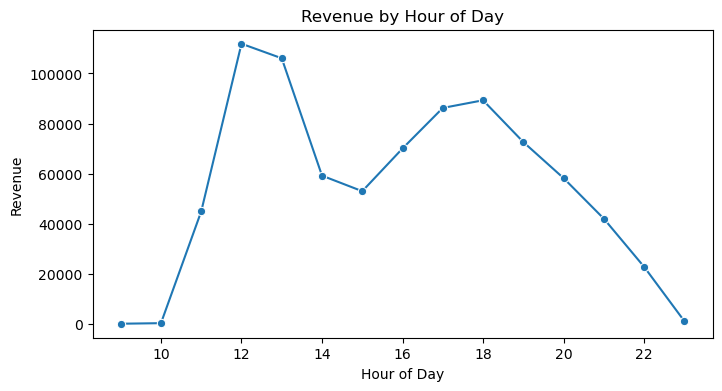

In [18]:
# 6. Peak Hours of Sales

df["hour"] = pd.to_datetime(df["time"].astype(str)).dt.hour
revenue_by_hour = df.groupby("hour")["revenue"].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=revenue_by_hour.index, y=revenue_by_hour.values, marker="o")
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.show()

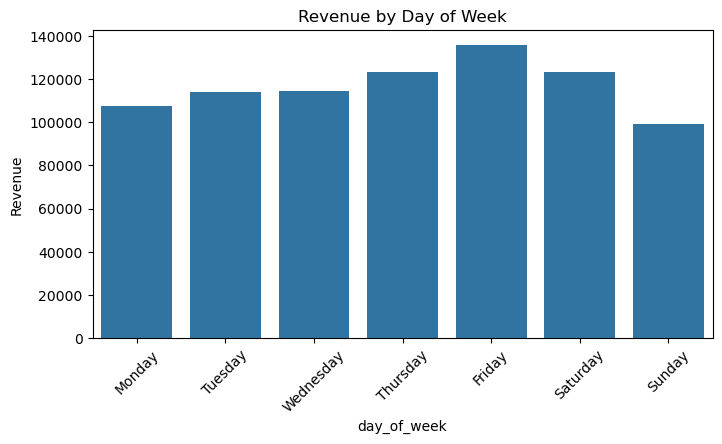

In [19]:
 ##7. Sales by Day of Week
df["day_of_week"] = df["date"].dt.day_name()
revenue_by_day = df.groupby("day_of_week")["revenue"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(8,4))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values)
plt.title("Revenue by Day of Week")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()

In [22]:
print("Busiest Day:", revenue_by_day.idxmax())

Busiest Day: Friday


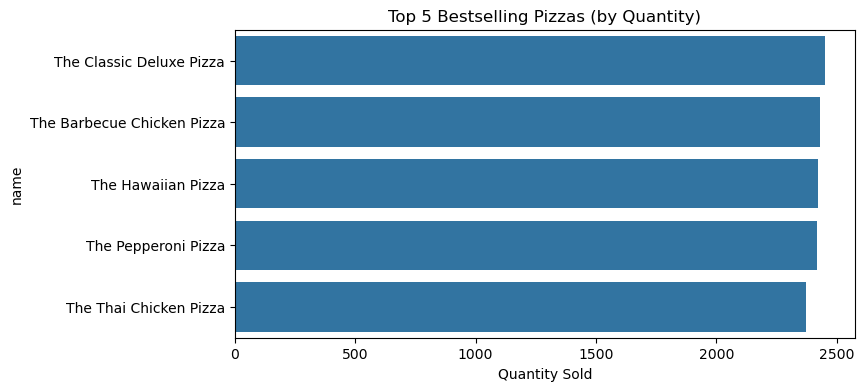

In [25]:
# 8. Top 5 Bestselling Pizzas


top5 = (df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5))

plt.figure(figsize=(8,4))
sns.barplot(x=top5.values, y=top5.index)
plt.title("Top 5 Bestselling Pizzas (by Quantity)")
plt.xlabel("Quantity Sold")
plt.show()

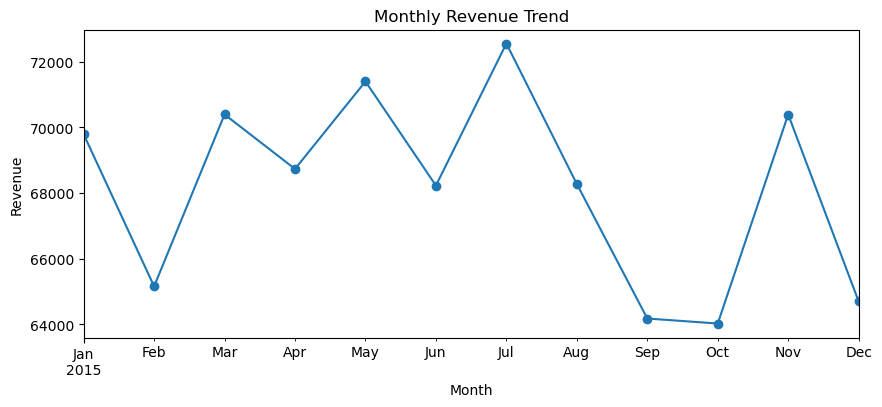

In [24]:
 # 9. Monthly Sales Trend

df["month"] = df["date"].dt.to_period("M")

monthly_sales = df.groupby("month")["revenue"].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

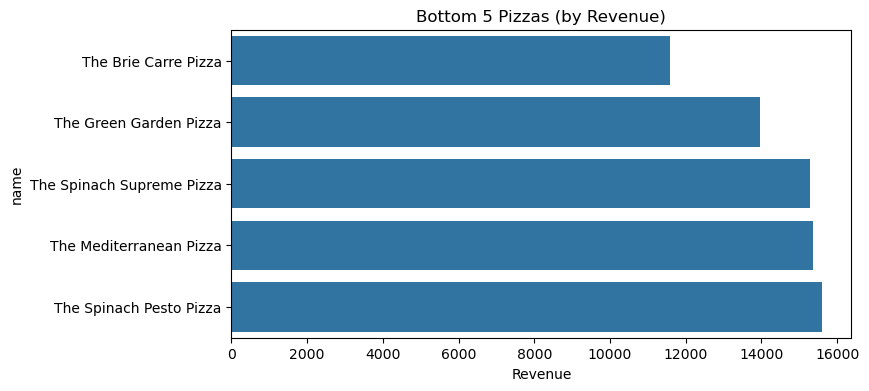

In [26]:
# 10. Bottom 5 Worst-performing Pizzas

bottom5 = (df.groupby("name")["revenue"].sum()
             .sort_values().head(5))

plt.figure(figsize=(8,4))
sns.barplot(x=bottom5.values, y=bottom5.index)
plt.title("Bottom 5 Pizzas (by Revenue)")
plt.xlabel("Revenue")
plt.show()